In [1]:
from itertools import combinations #calcolare tutte le combinazioni possibili date una serie di dati
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

SEED = 42

data = load_wine()

/var/folders/13/r2qtp3l16ngdy08zglqkfxyc0000gn/T/ipykernel_841/3374830904.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
print(dir(data))
print(data.DESCR)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.

In [3]:
print(data.data.shape)

(178, 13)


In [4]:
reshaped= data.target.reshape((data.target.shape[0],1))
print(data.target.shape)
print(reshaped.shape) #ora hanno la stessa shape

(178,)
(178, 1)


In [5]:
df=pd.DataFrame(
    data= np.concatenate((data.data, reshaped), axis=1),
    columns= np.concatenate((data.feature_names, ['target']))
)
df.head()
#vediamo però che il target è un float, noi vogliamo interi

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [6]:
df['target']=df['target'].astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [7]:
df.pivot_table(aggfunc="size",index="target")
#dataset sbilanciato

target
0    59
1    71
2    48
dtype: int64

<Axes: xlabel='target'>

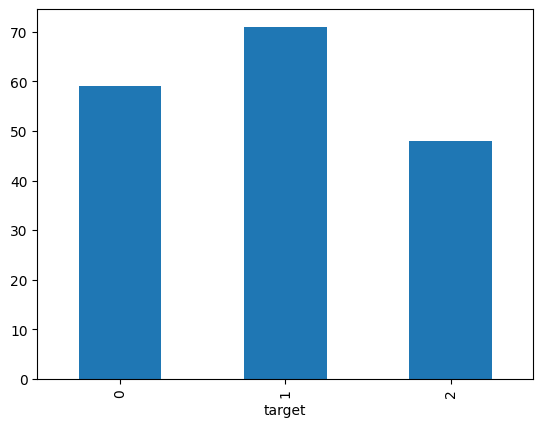

In [8]:
df.pivot_table(aggfunc="size",index="target").plot(kind="bar")

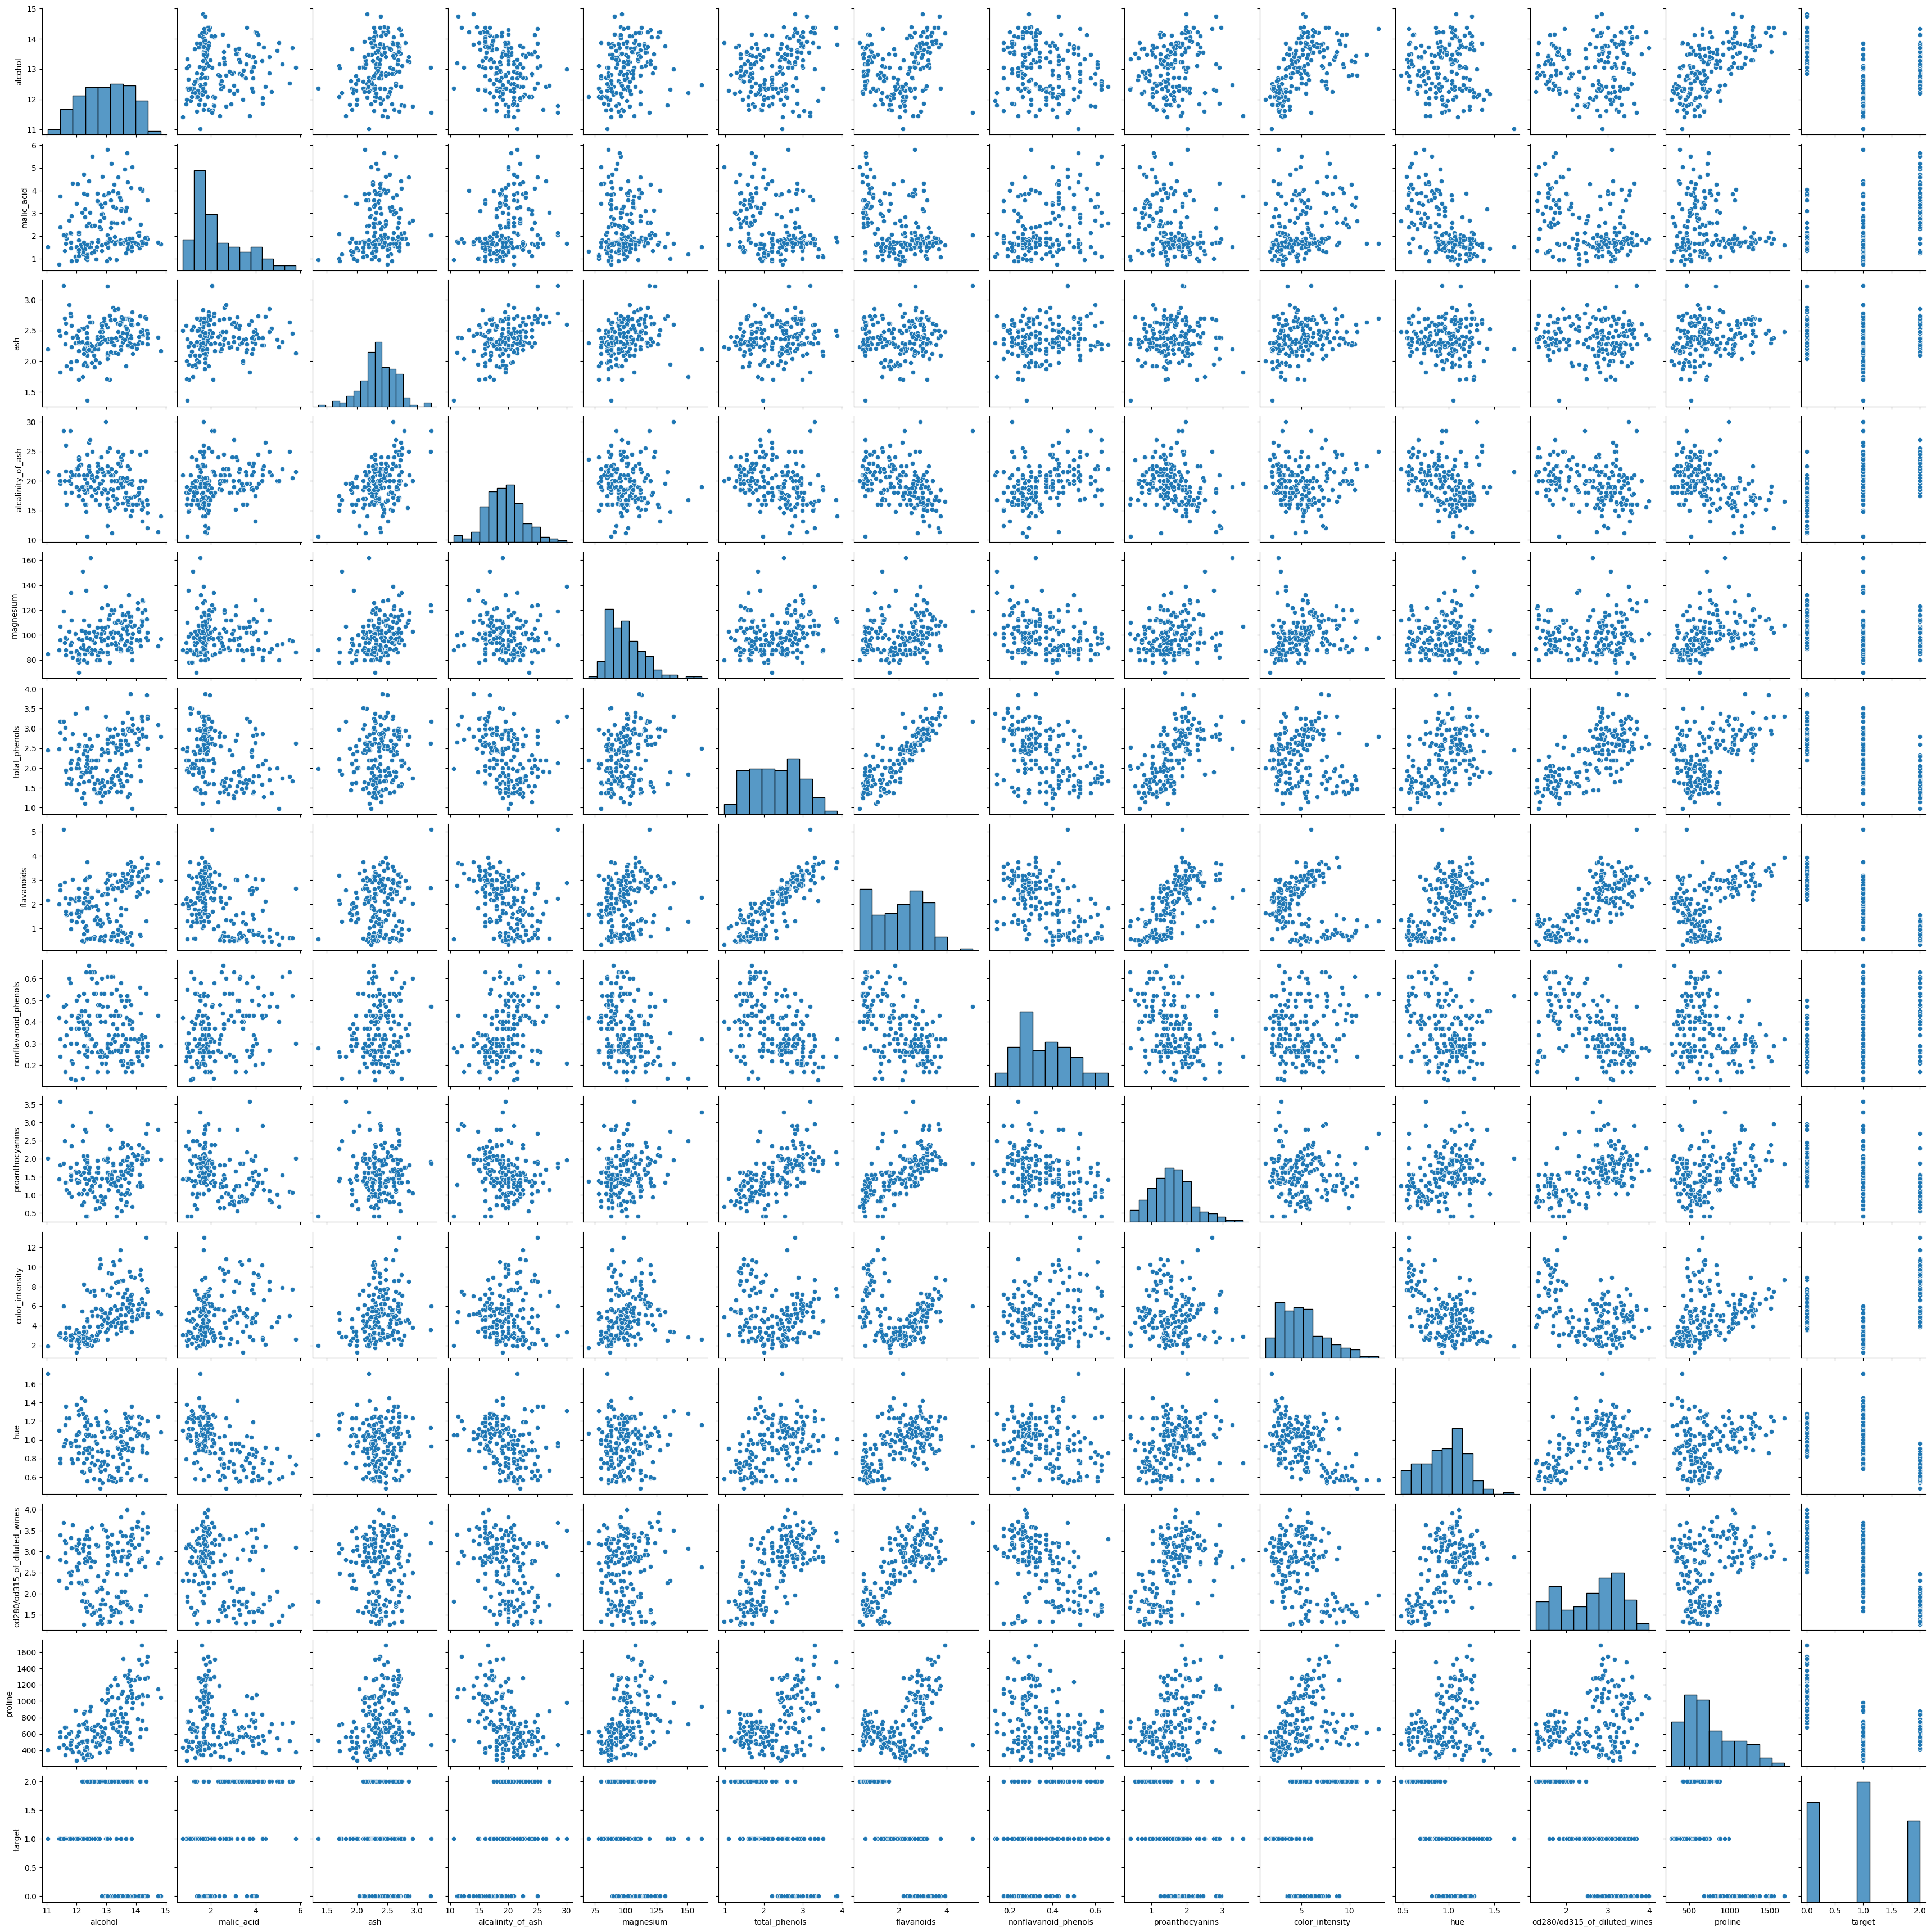

In [9]:
#mette in relazione tutte le osservazioni di un dataset inserendole all'interno di una macro matrice che ad ogni indice di riga-colonna crea un grafico che identifica la correlazione
sns.pairplot(df)

In [10]:
X=data.data
y=data.target
X_train, X_test, y_train, y_test =train_test_split(X,y, random_state=SEED)

In [11]:
print(X_train.shape)
print(X_test.shape)

(133, 13)
(45, 13)


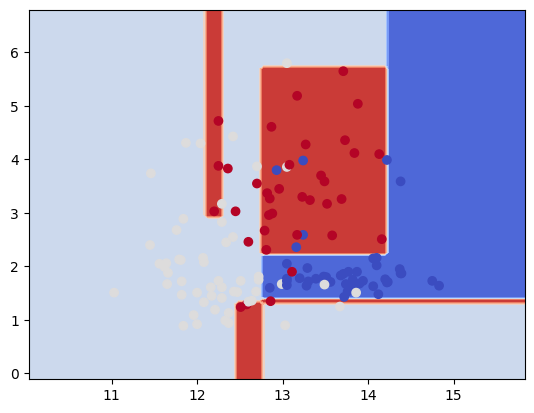

In [12]:
from sklearn.inspection import DecisionBoundaryDisplay
#partiziona lo spazio in modo da capire come viene classificata una osservazione quando ricade in quello spazio vettoriale

X_train_cols=X_train[:,:2]

classifier=DecisionTreeClassifier(max_depth=4, random_state=SEED)
classifier.fit(X_train_cols, y_train)

display=DecisionBoundaryDisplay.from_estimator(
    classifier, #classificatore su cui vogliamo disegnare il dispaly
    X_train_cols,
    cmap=plt.cm.coolwarm
)

display.ax_.scatter(
    X_train_cols[:,0],
    X_train_cols[:,1],
    c=y_train,
    cmap=plt.cm.coolwarm
)

#vediamo come l'albero partiziona lo spazio decisionale delle prime due features

In [16]:
#creaimo combinazioni di features con le quali addestrare gli alberi, 
#vogliamo inserire tutte le figure che dimostrano come vari alberi partizionano lo spazio di feature diverse

comb=combinations(np.arange(0,6),2) #combinaizoni di coppie
print(comb)
unique=sorted(set(comb))
print(unique)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]


3
0 (0, 1)
Pairs ['alcohol', 'malic_acid']: accuracy 0.822
1 (0, 2)
Pairs ['alcohol', 'ash']: accuracy 0.711
2 (0, 3)
Pairs ['alcohol', 'alcalinity_of_ash']: accuracy 0.756
3 (0, 4)
Pairs ['alcohol', 'magnesium']: accuracy 0.733
4 (0, 5)
Pairs ['alcohol', 'total_phenols']: accuracy 0.844
5 (1, 2)
Pairs ['malic_acid', 'ash']: accuracy 0.667
6 (1, 3)
Pairs ['malic_acid', 'alcalinity_of_ash']: accuracy 0.756
7 (1, 4)
Pairs ['malic_acid', 'magnesium']: accuracy 0.711
8 (1, 5)
Pairs ['malic_acid', 'total_phenols']: accuracy 0.8
9 (2, 3)
Pairs ['ash', 'alcalinity_of_ash']: accuracy 0.622
10 (2, 4)
Pairs ['ash', 'magnesium']: accuracy 0.511
11 (2, 5)
Pairs ['ash', 'total_phenols']: accuracy 0.689
12 (3, 4)
Pairs ['alcalinity_of_ash', 'magnesium']: accuracy 0.6
13 (3, 5)
Pairs ['alcalinity_of_ash', 'total_phenols']: accuracy 0.778
14 (4, 5)
Pairs ['magnesium', 'total_phenols']: accuracy 0.778


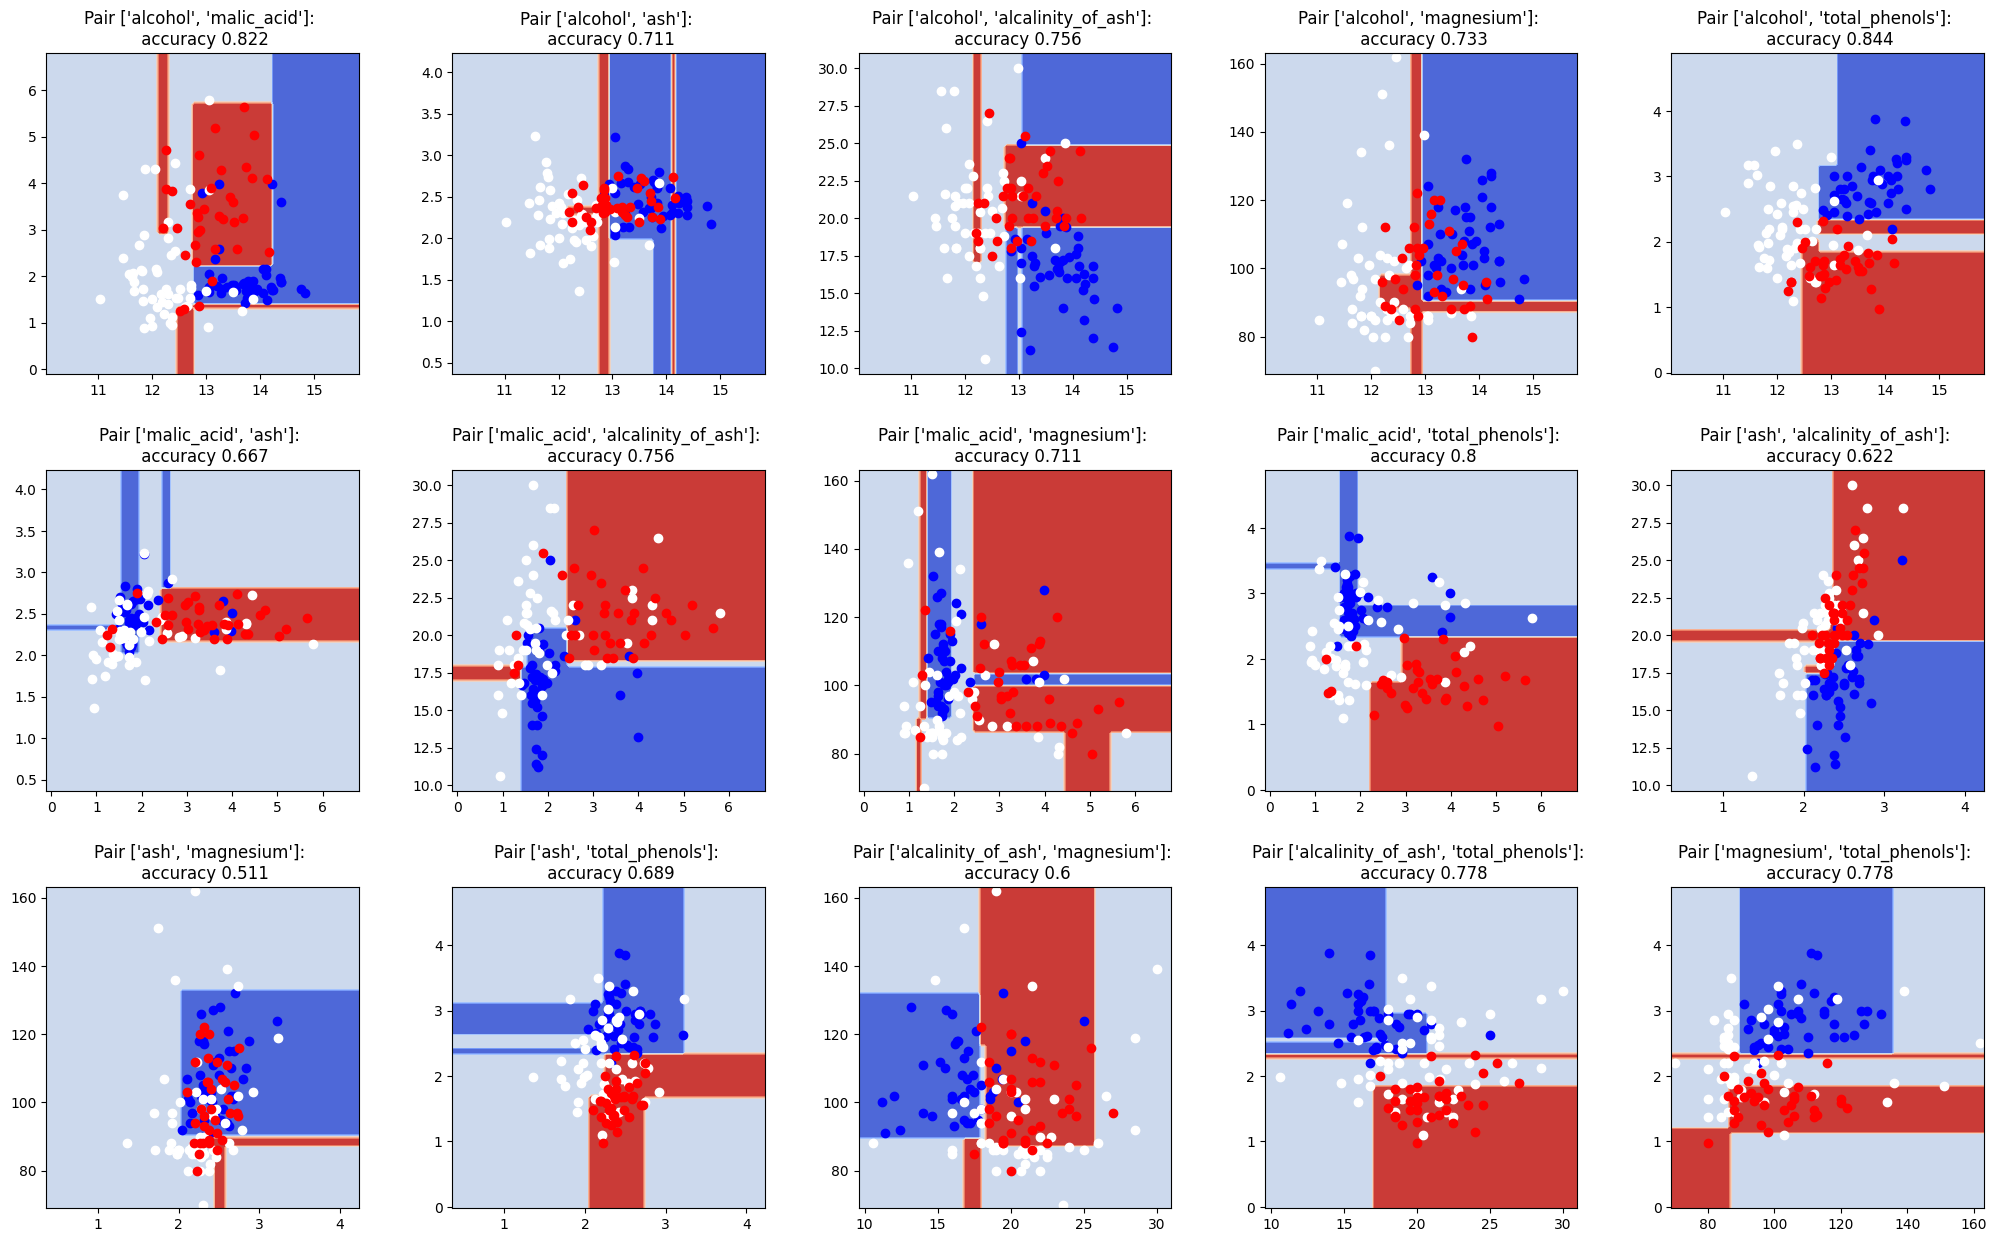

In [40]:
n_classes=len(set(y))
print(n_classes)
plt.figure(figsize=(25,15))
#cicliamo su tutte le combinazioni
for index, pair in enumerate(unique):
    print(index,pair)
    X_train_cols=X_train[:,pair]
    X_test_cols= X_test[:,pair]

    clf=DecisionTreeClassifier(
        max_depth=4,
        random_state=SEED
    ).fit(X_train_cols, y_train)

    y_pred=clf.predict(X_test_cols)
    feature_names= [name for i, name in enumerate(data.feature_names) if i in pair]
    print(f"Pairs {feature_names}: accuracy {round(accuracy_score(y_test, y_pred), 3)}")
    
    ax=plt.subplot(3,5, index+1) #i grafici partono dalla posizione 1, non 0
    ax.set_title(f"Pair {feature_names}: \n accuracy {round(accuracy_score(y_test, y_pred), 3)}")
    DecisionBoundaryDisplay.from_estimator(
        clf, #classificatore su cui vogliamo disegnare il dispaly
        X_train_cols,
        cmap=plt.cm.coolwarm,
        ax=ax
    )
    for i, color in zip(range(n_classes),"bwr"):
        idx=np.where(y_train==i) #scatter solo dei punti con valore di classe pari a i
        plt.scatter(
            X_train_cols[idx,0], #tutte le osservazioni della clsse iesima
            X_train_cols[idx,1],
            c=color,
            label=data.target_names[i]
        )

plt.subplots_adjust(wspace=0.3, hspace=0.3)

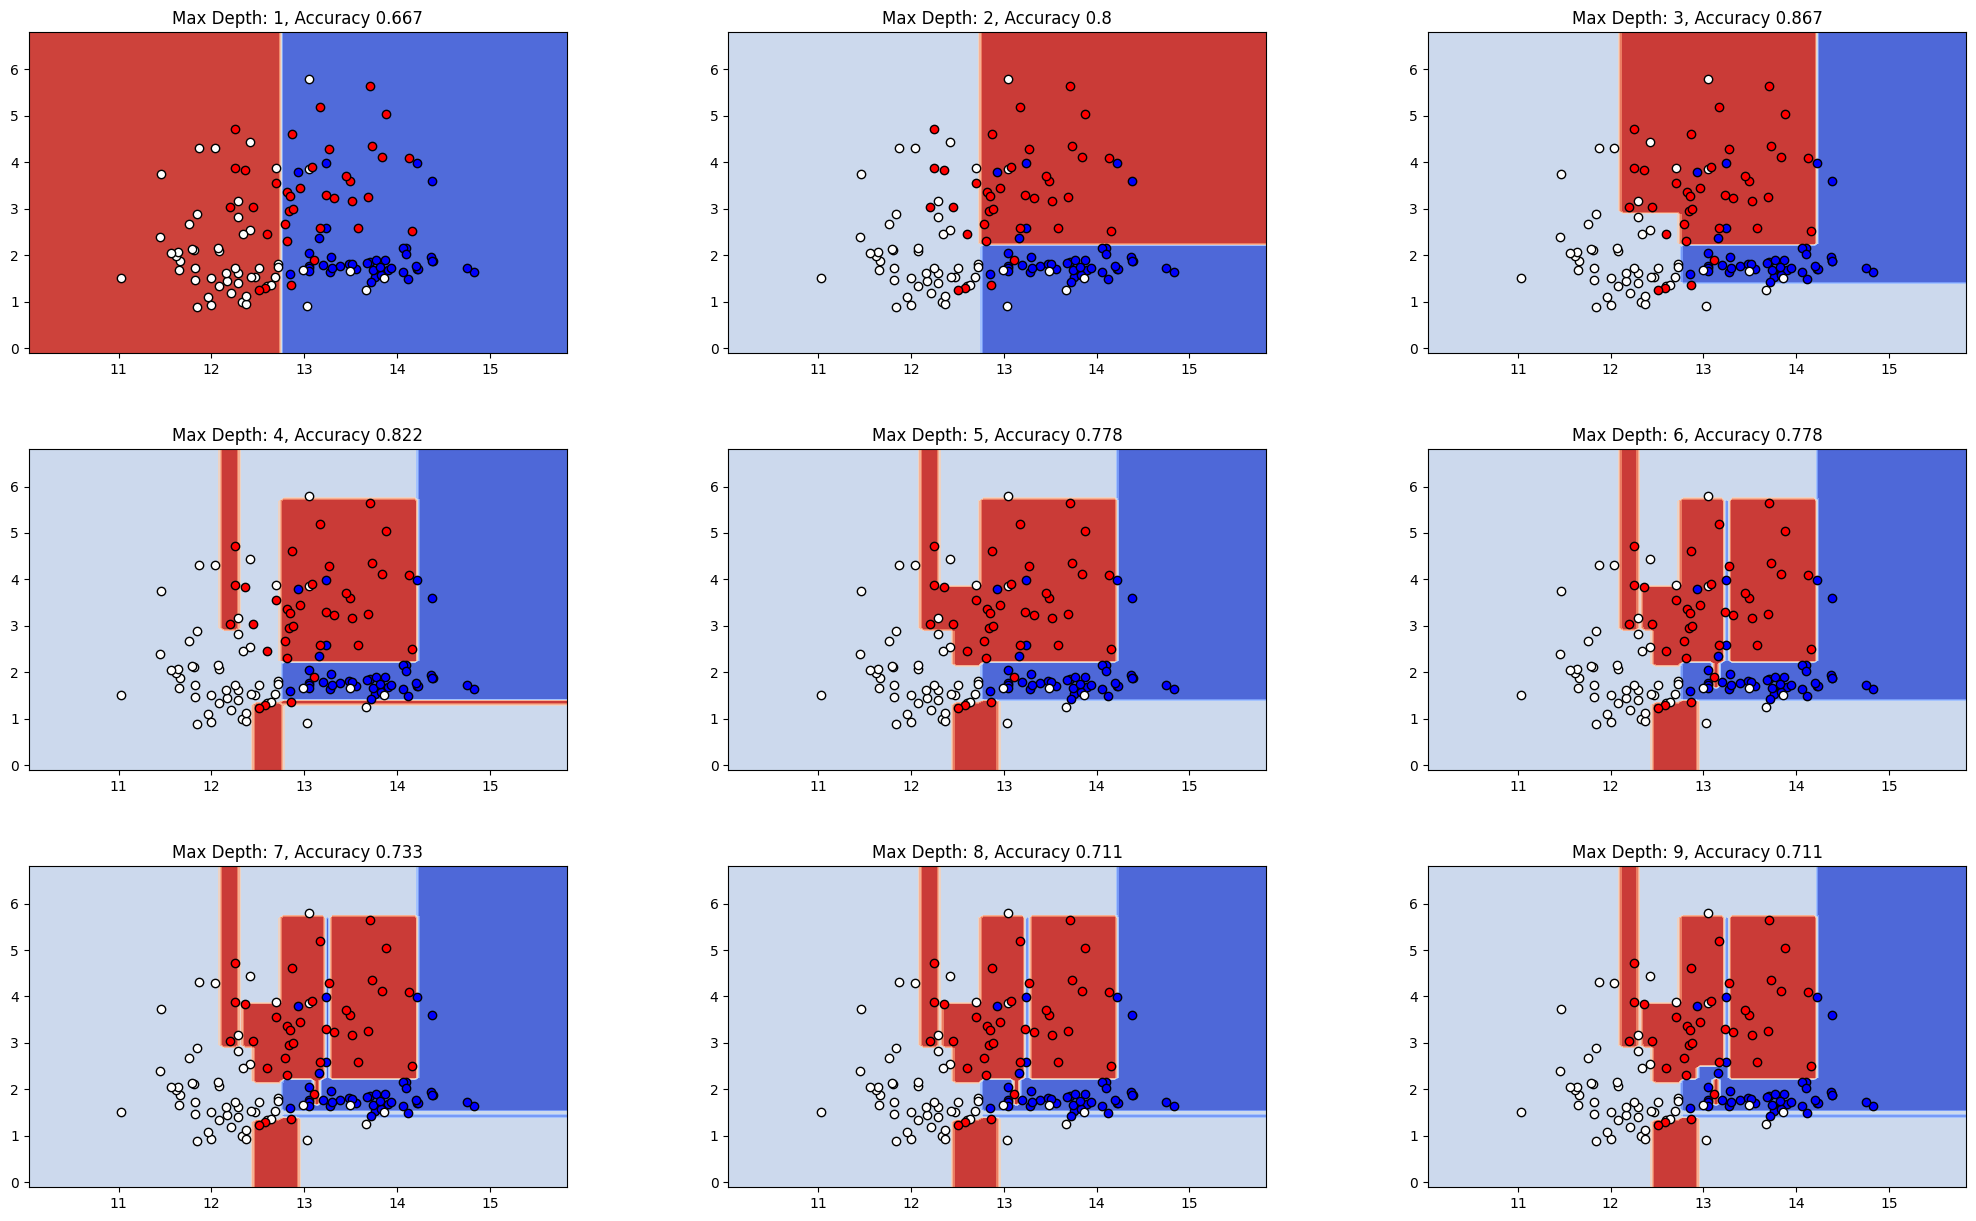

In [43]:
plt.figure(figsize=(25,15))

X_train_cols=X_train[:,:2]
X_test_cols= X_test[:,:2]

for d in range (0,9):
    clf=DecisionTreeClassifier(
        max_depth= d +1, #dobbiamo iniziare da 1
        random_state=SEED
    ).fit(X_train_cols, y_train)

    y_pred=clf.predict(X_test_cols)
    
    ax=plt.subplot(3,3, d+1) #i grafici partono dalla posizione 1, non 0
    ax.set_title(f"Max Depth: {d+1}, Accuracy {round(accuracy_score(y_test, y_pred), 3)}")

    DecisionBoundaryDisplay.from_estimator(
        clf, #classificatore su cui vogliamo disegnare il dispaly
        X_train_cols,
        cmap=plt.cm.coolwarm,
        ax=ax
    )
    for i, color in zip(range(n_classes),"bwr"):
        idx=np.where(y_train==i) #scatter solo dei punti con valore di classe pari a i
        plt.scatter(
            X_train_cols[idx,0], #tutte le osservazioni della clsse iesima
            X_train_cols[idx,1],
            c=color,
            label=data.target_names[i],
            edgecolor="k"
        )

plt.subplots_adjust(wspace=0.3, hspace=0.3)